In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = 'C:\\Users\\shrav\\OneDrive\\Desktop\\Shravanitasks\\Churn_Modelling.csv'

In [2]:
from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
print('df:', df.shape)

df: (10000, 14)


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


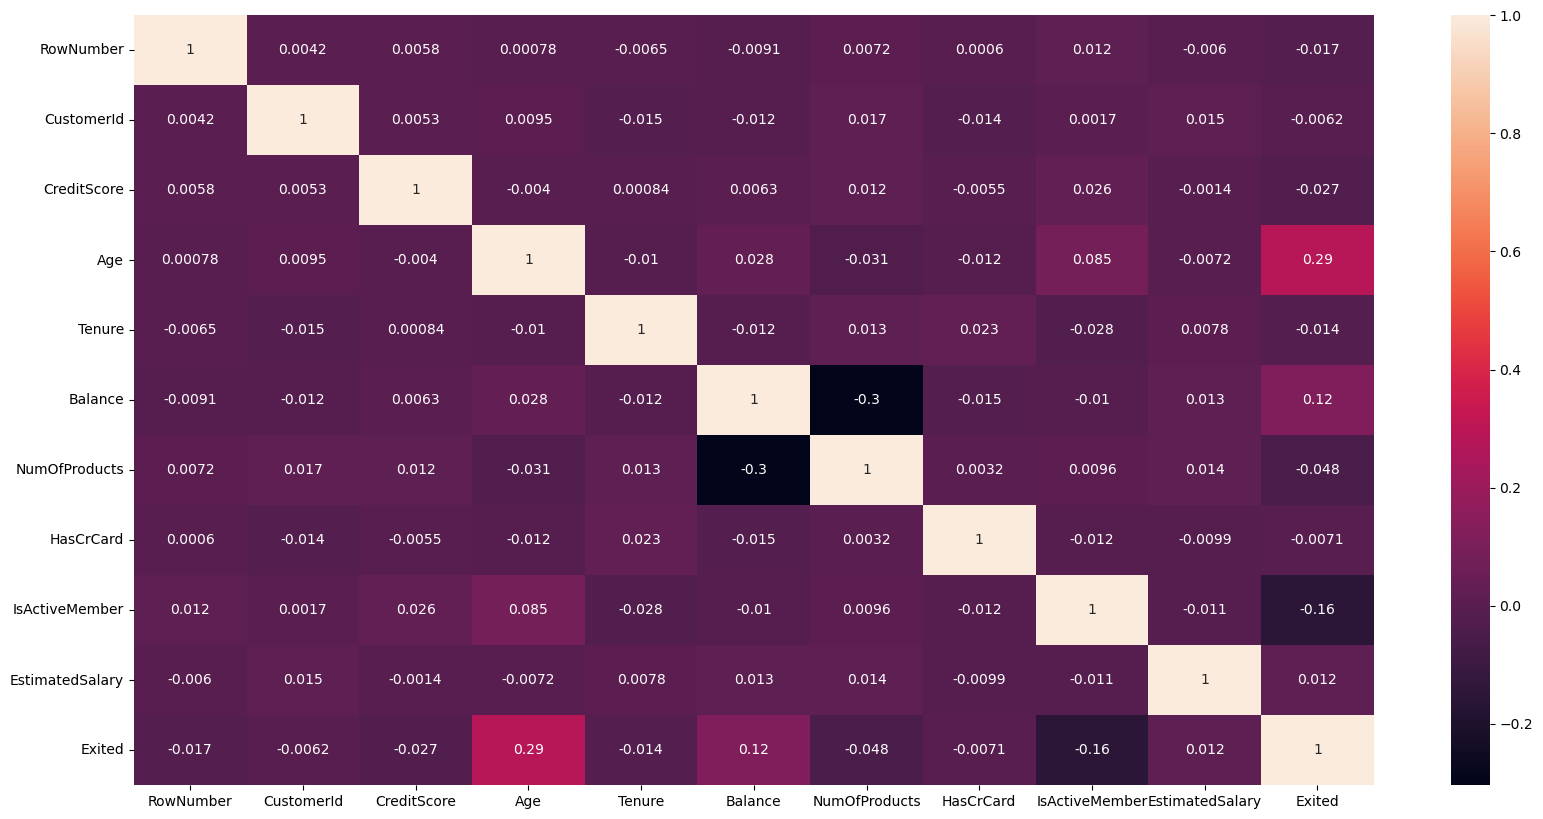

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix based on numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [13]:
col = []
for i in df.columns:
  num = len(df[i].unique())
  print(i,':', str(num) + str(' Distinct values'))
  #append < 10 distinct values columns in list
  if num < 10:
    col.append(i)

RowNumber : 10000 Distinct values
CustomerId : 10000 Distinct values
Surname : 2932 Distinct values
CreditScore : 460 Distinct values
Geography : 3 Distinct values
Gender : 2 Distinct values
Age : 70 Distinct values
Tenure : 11 Distinct values
Balance : 6382 Distinct values
NumOfProducts : 4 Distinct values
HasCrCard : 2 Distinct values
IsActiveMember : 2 Distinct values
EstimatedSalary : 9999 Distinct values
Exited : 2 Distinct values


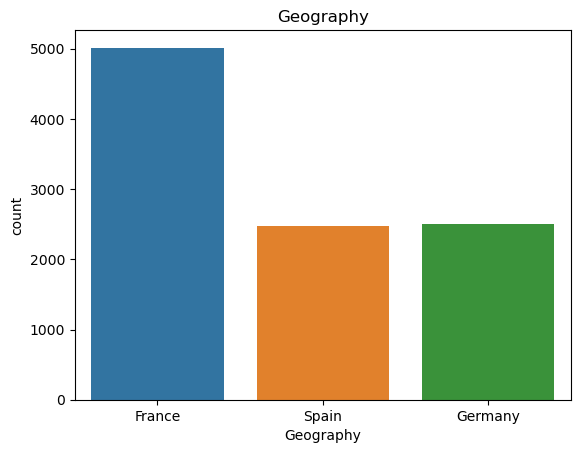

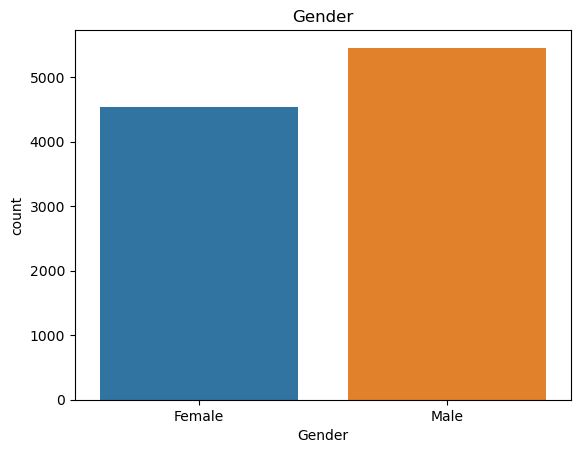

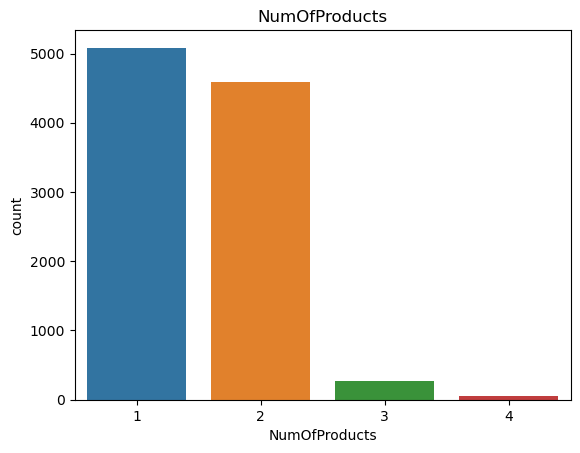

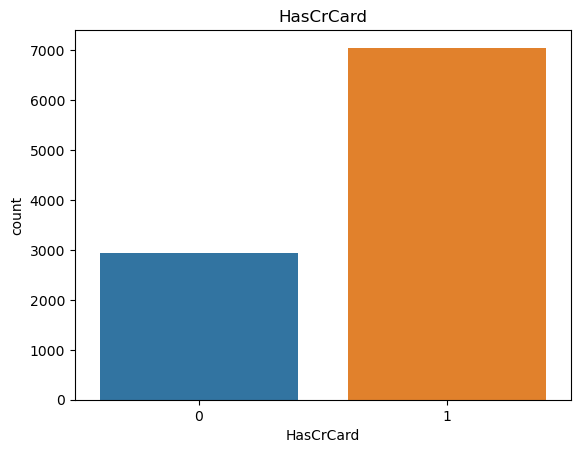

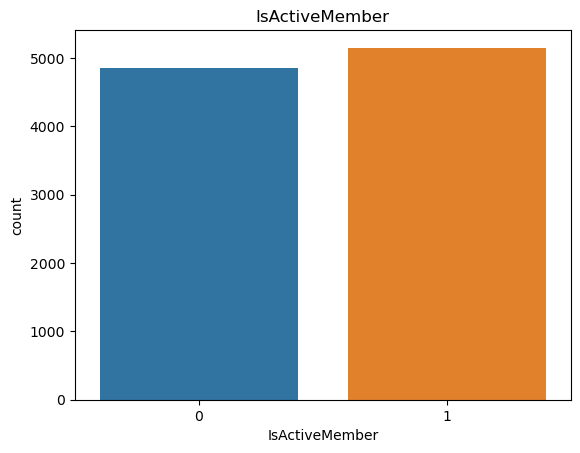

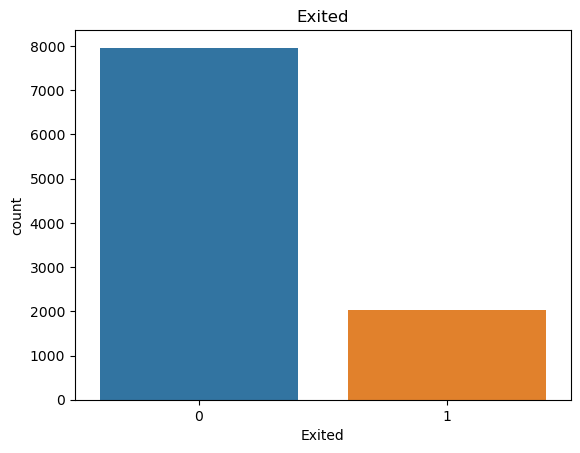

In [14]:
for i in col:
  sns.countplot(x=i, data=df)
  plt.title(i)
  plt.show()

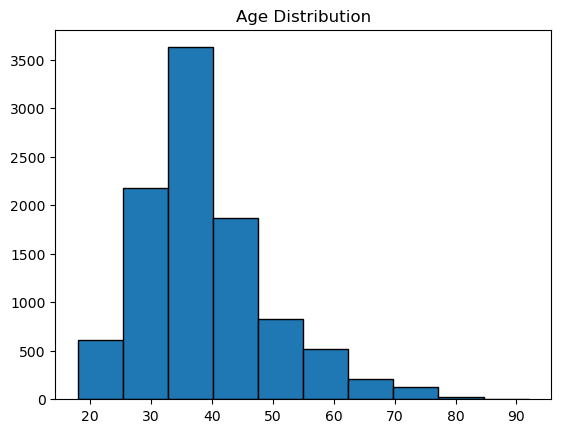

In [15]:
plt.hist(df['Age'], edgecolor='black')
plt.title('Age Distribution')
plt.show()

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True )

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [20]:
df = pd.get_dummies(data = df, columns=['Geography'], drop_first=True)

In [21]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


<Axes: >

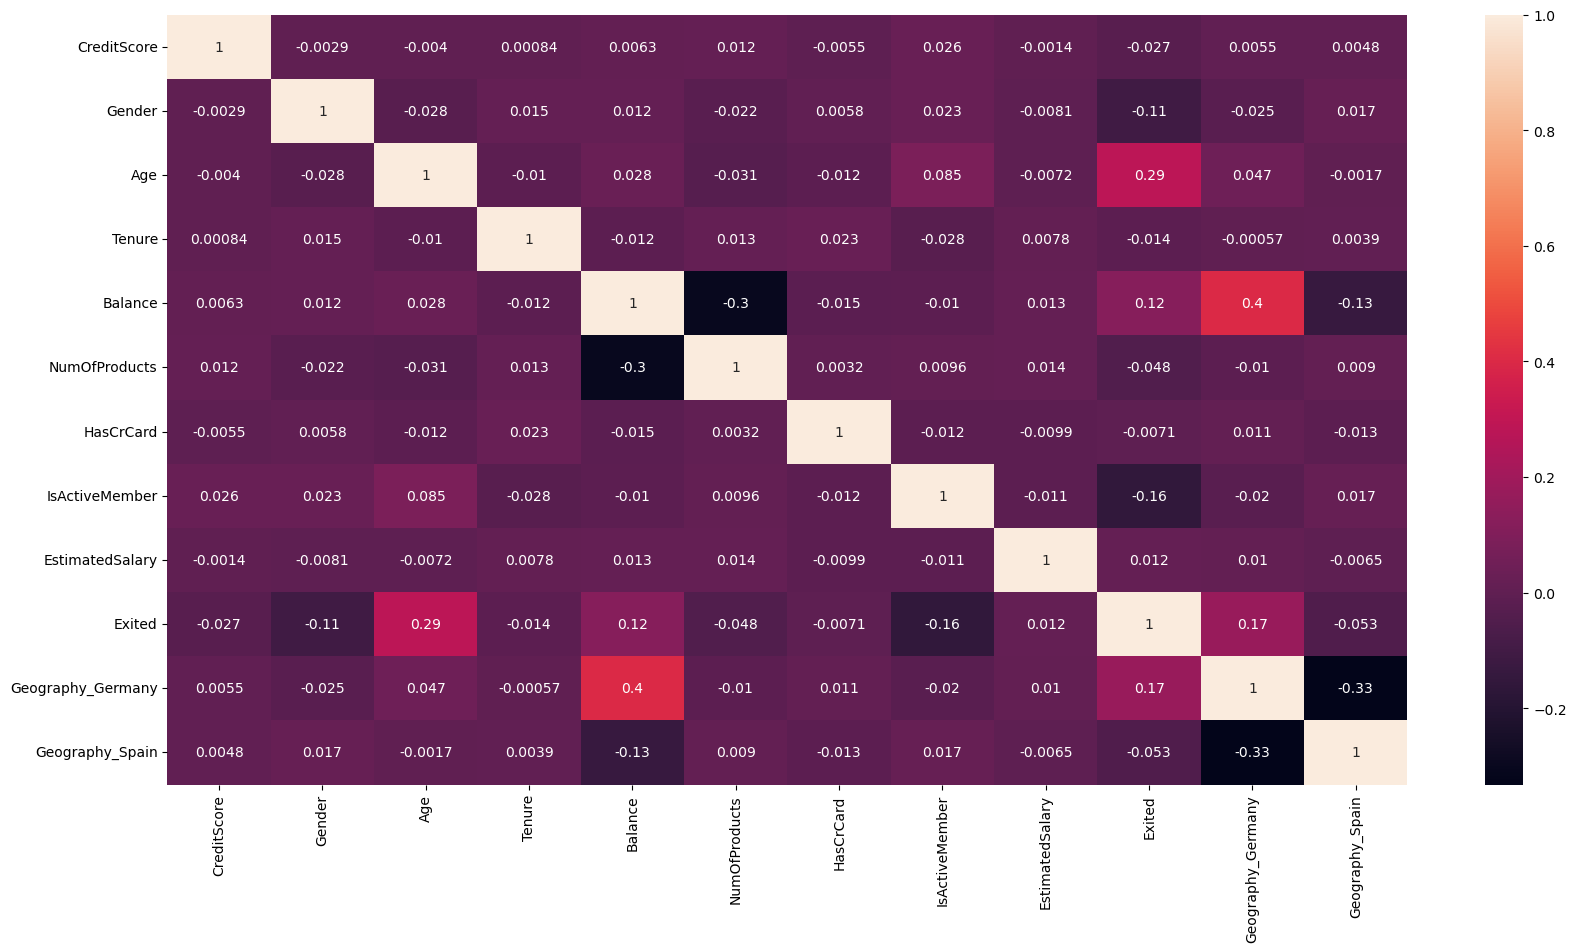

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

In [23]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [25]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(8000, 11) (2000, 11)
(8000,) (2000,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
     

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 42)
log.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
R = RandomForestClassifier(n_estimators=5 ,random_state = 42)
R.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [29]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, random_state=42)
clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=10, random_state=42)

In [30]:
classifier = [log, R, clf]
model = ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier']
     


for Logistic Regression:

75.9
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      1518
        True       0.00      0.00      0.00       482

    accuracy                           0.76      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.58      0.76      0.66      2000



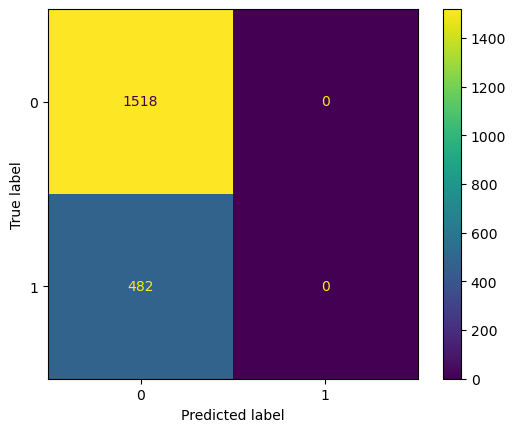


for Random Forest Classifier:

70.8
              precision    recall  f1-score   support

       False       0.78      0.85      0.82      1518
        True       0.36      0.27      0.31       482

    accuracy                           0.71      2000
   macro avg       0.57      0.56      0.56      2000
weighted avg       0.68      0.71      0.69      2000



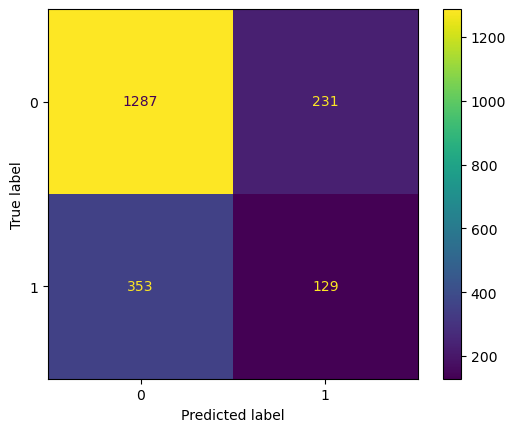


for Gradient Boosting Classifier:

74.65
              precision    recall  f1-score   support

       False       0.76      0.98      0.85      1518
        True       0.23      0.02      0.04       482

    accuracy                           0.75      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.63      0.75      0.66      2000



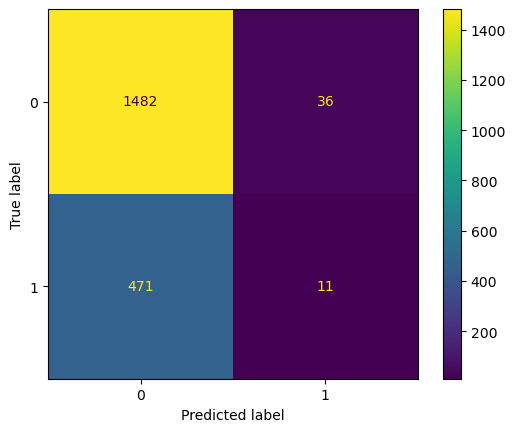

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
for i in range(len(classifier)):
  y_pred = classifier[i].predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)*100
  print('\nfor ' + str(model[i]) + ':\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  plt.rcParams['axes.grid'] = False
  disp.plot()
  print(accuracy)
  print(classification_report(y_test, y_pred))
  plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
for i in classifier:
  accuracies  = cross_val_score(estimator=i, X = x_train, y = y_train, cv = 10)
  print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.06 %
Standard Deviation: 0.06 %
Accuracy: 68.74 %
Standard Deviation: 1.46 %
Accuracy: 74.36 %
Standard Deviation: 0.63 %


In [33]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [*range(10,200,30)], 'learning_rate':np.arange(0, 1, 0.25), 'max_depth':[*range(1, 5, 2)]}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 75.06 %
Best Parameters: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 10}


In [34]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, random_state=42, max_depth = 3)
clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, random_state=42)

In [35]:
parameters = [{'n_estimators': [*range(10,200,30)], 'max_depth':[*range(1, 20, 2)]}]
grid_search = GridSearchCV(estimator = R,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 75.08 %
Best Parameters: {'max_depth': 5, 'n_estimators': 10}


In [36]:
R = RandomForestClassifier(n_estimators=160 ,random_state = 42, max_depth = 9)
R.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=160, random_state=42)

In [37]:
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'aga']}]
grid_search = GridSearchCV(estimator = log,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 75.06 %
Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [38]:
log = LogisticRegression(C= 0.01, penalty = 'l2' ,random_state = 42)
log.fit(x_train, y_train)

LogisticRegression(C=0.01, random_state=42)


for Logistic Regression:

75.9
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      1518
        True       0.00      0.00      0.00       482

    accuracy                           0.76      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.58      0.76      0.66      2000



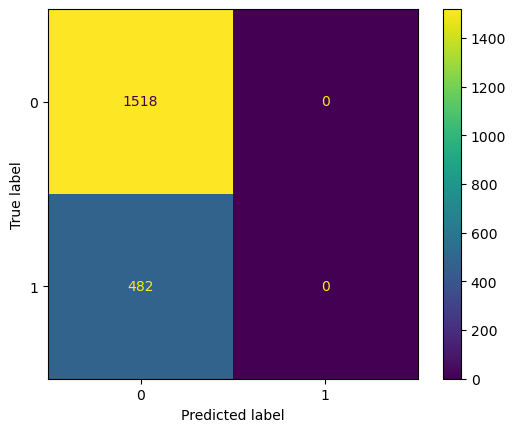


for Random Forest Classifier:

70.8
              precision    recall  f1-score   support

       False       0.78      0.85      0.82      1518
        True       0.36      0.27      0.31       482

    accuracy                           0.71      2000
   macro avg       0.57      0.56      0.56      2000
weighted avg       0.68      0.71      0.69      2000



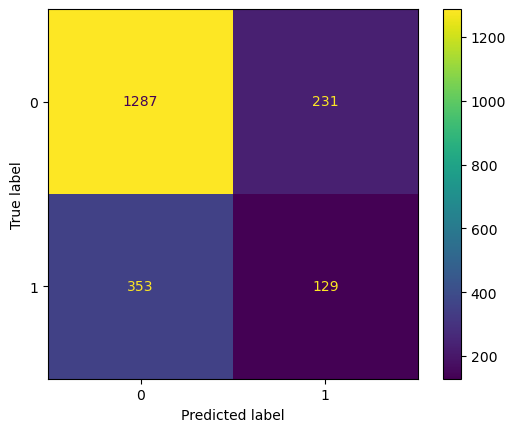


for Gradient Boosting Classifier:

74.65
              precision    recall  f1-score   support

       False       0.76      0.98      0.85      1518
        True       0.23      0.02      0.04       482

    accuracy                           0.75      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.63      0.75      0.66      2000



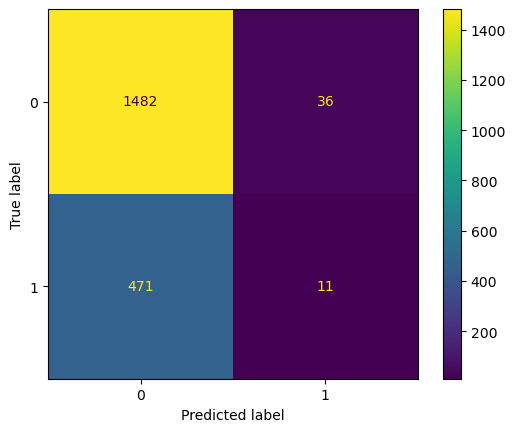

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
for i in range(len(classifier)):
  y_pred = classifier[i].predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)*100
  print('\nfor ' + str(model[i]) + ':\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  plt.rcParams['axes.grid'] = False
  disp.plot()
  print(accuracy)
  print(classification_report(y_test, y_pred))
  plt.show()

In [40]:
from sklearn.model_selection import cross_val_score
for i in classifier:
  accuracies  = cross_val_score(estimator=i, X = x_train, y = y_train, cv = 10)
  print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
     

Accuracy: 75.06 %
Standard Deviation: 0.06 %
Accuracy: 68.74 %
Standard Deviation: 1.46 %
Accuracy: 74.36 %
Standard Deviation: 0.63 %
